# Decision Tree Visualization

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
# Load the Dataset

iris = datasets.load_iris()
x=pd.DataFrame(iris.data,columns=iris.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y=pd.DataFrame(iris.target,columns=["Target"])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [4]:
# Fit the classifier with default hyper-parameters
dtc = DecisionTreeClassifier(random_state=42)
model = dtc.fit(x, y)

In [5]:
# Text Representation
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## Visualizing Tree with plot_tree

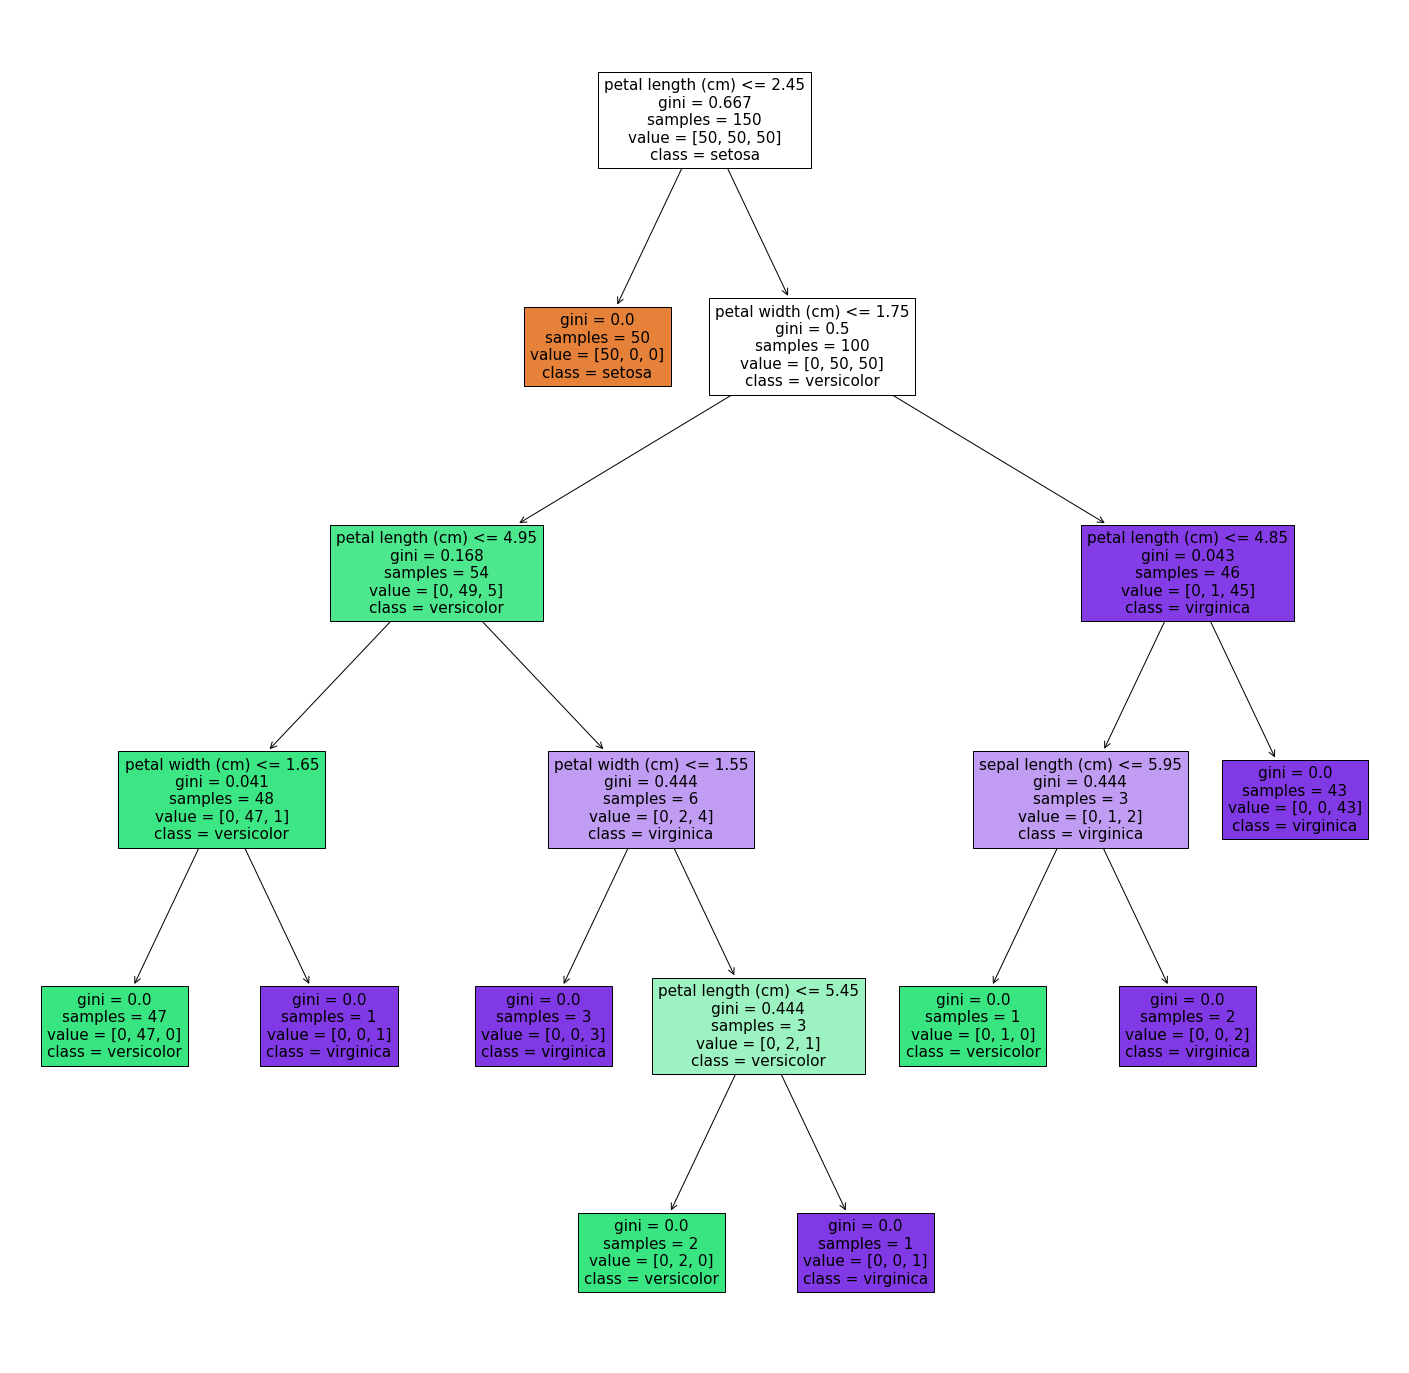

In [7]:
fig = plt.figure(figsize=(25,25))
fig = tree.plot_tree(dtc, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

## Predicting

In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
predicted=dtc.predict(x_test)

In [13]:
classificationreport = classification_report(y_test,predicted)
print(classificationreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

